In [1]:
import glob
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from Functions.class_Graph_TM import Graph_TM
from networkx.algorithms.cluster import *
from networkx.algorithms.distance_measures import *
from networkx.algorithms.shortest_paths.generic import *


In [2]:
files = sorted(glob.glob('Data/*.csv'))
G = Graph_TM()
G.insert_cbs(files)

Graph saved as ../TeX/img/all_comic_books_biggest_component.png


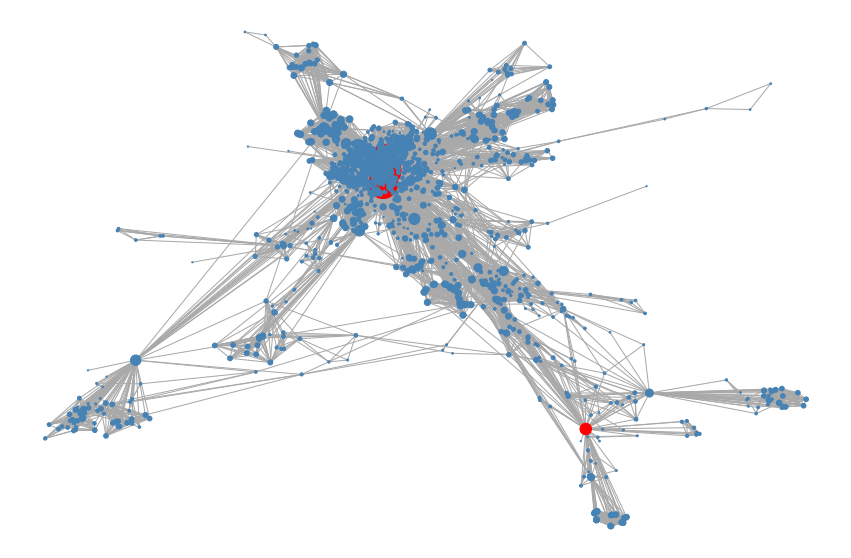

In [3]:
G.plot_network(max_node_size = 1000,
               filename = 'all_comic_books_biggest_component')

Graph saved as ../TeX/img/all_comic_books_all_components.png


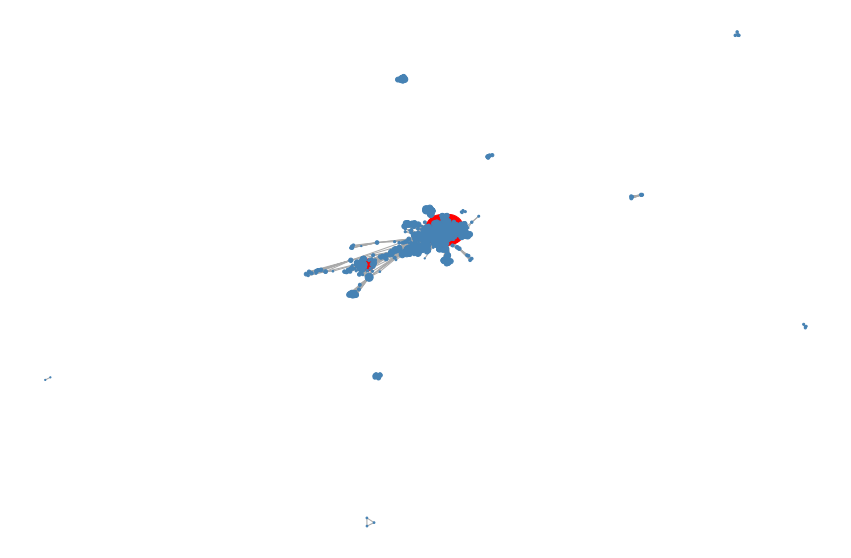

In [4]:
G.plot_network(max_node_size = 1000,
               max_connected_components = 'all',
               filename = 'all_comic_books_all_components')

In [5]:
connected_components = list(nx.connected_components(G.Graph))
print(nx.info(G.Graph))
print(f'Connected components: {len(connected_components)}')

Name: 
Type: Graph
Number of nodes: 1524
Number of edges: 10818
Average degree:  14.1969
Connected components: 10


In [6]:
# trabalhando só com a maior componente conexa
H = nx.subgraph(G.Graph, connected_components[0])
avg_distance = nx.average_shortest_path_length(H)
d = diameter(H)
print(nx.info(H))
print(f'Average distance: {avg_distance:.4f}')
print(f'Diameter: {d}')

Name: 
Type: Graph
Number of nodes: 1464
Number of edges: 10562
Average degree:  14.4290
Average distance: 2.8279
Diameter: 7


In [7]:
nodes = list(H.nodes())
paths = dict(shortest_path(H))
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        u = nodes[i]
        v = nodes[j]
        if len(paths[u][v]) == (d + 1):
            arrow = ' -> '
            print(f'Path from {u} to {v}:', arrow.join(paths[u][v]), sep = '\n')
            print()

Path from Guarda 1 to Cafuné:
Guarda 1 -> Imperador -> Dona Luísa -> Mônica -> Astronauta -> Índio -> Papa-Capim -> Cafuné

Path from Guarda 1 to Outro Índio:
Guarda 1 -> Imperador -> Dona Luísa -> Mônica -> Astronauta -> Índio -> Papa-Capim -> Outro Índio

Path from gibi 10 Criança 14 to Cafuné:
gibi 10 Criança 14 -> Homem 1 -> Dona Morte -> Mônica -> Astronauta -> Índio -> Papa-Capim -> Cafuné

Path from gibi 10 Criança 14 to Outro Índio:
gibi 10 Criança 14 -> Homem 1 -> Dona Morte -> Mônica -> Astronauta -> Índio -> Papa-Capim -> Outro Índio

Path from Cafuné to gibi 15 Criança 12:
Cafuné -> Papa-Capim -> Onça -> Borboleta -> Mônica -> gibi 15 Criança 11 -> Nico Demo -> gibi 15 Criança 12

Path from Cafuné to gibi 15 Criança 14:
Cafuné -> Papa-Capim -> Onça -> Borboleta -> Mônica -> gibi 15 Criança 11 -> Nico Demo -> gibi 15 Criança 14

Path from Outro Índio to gibi 15 Criança 12:
Outro Índio -> Papa-Capim -> Onça -> Borboleta -> Mônica -> gibi 15 Criança 11 -> Nico Demo -> gibi 15 

Graph saved as ../TeX/img/communities_biggest_component.png


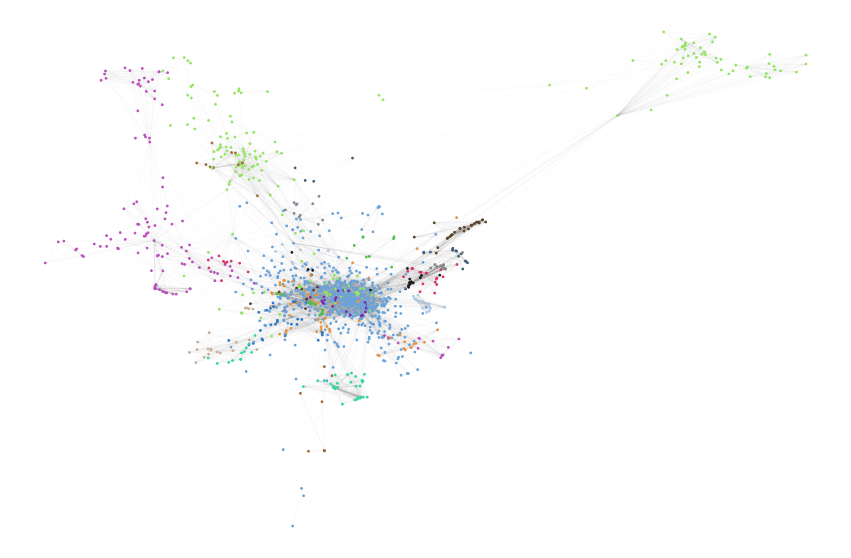

In [8]:
G.plot_communities(filename = 'communities_biggest_component')

Graph saved as ../TeX/img/communities_all_components.png


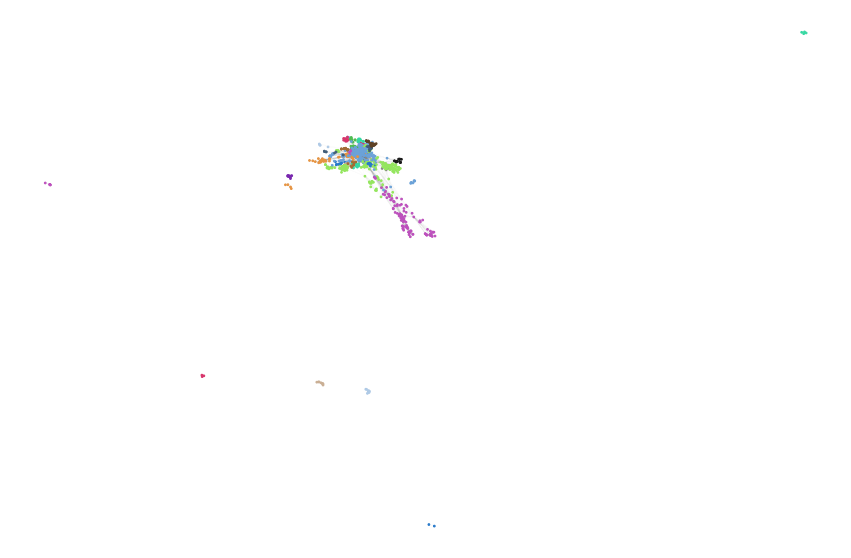

In [9]:
G.plot_communities(max_connected_components = 'all',
                   filename = 'communities_all_components')

In [10]:
H['Cascão']['Cebolinha']

{'weight': 458.5, 'community': 1}

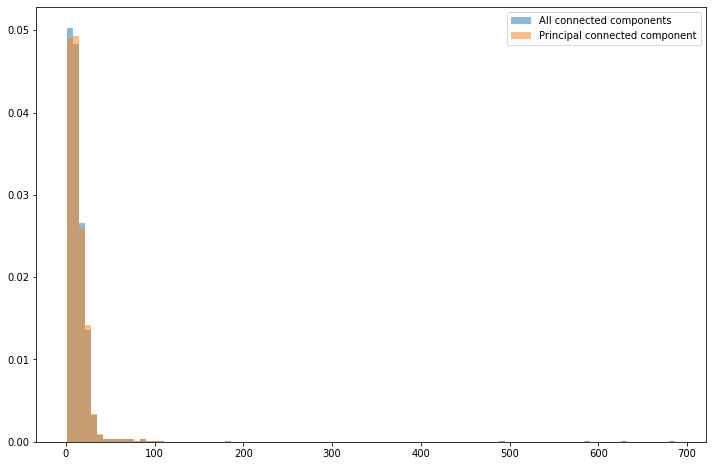

In [11]:
# degree distribuition
plt.figure(figsize = (12, 8))
plt.hist([float(i) for i in np.array(G.Graph.degree)[:,1]],
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'All connected components')

plt.hist([float(i) for i in np.array(H.degree)[:, 1]],
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'Principal connected component')

plt.legend(loc = 'upper right')
plt.show()

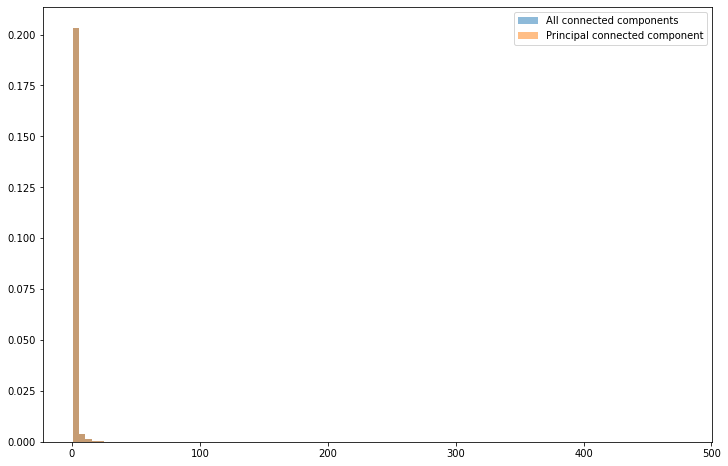

In [12]:
# weight distribuition
plt.figure(figsize = (12, 8))
plt.hist([float(G.Graph[u][v]['weight']) for u, v in G.Graph.edges()],
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'All connected components')

plt.hist([float(H[u][v]['weight']) for u, v in H.edges()],
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'Principal connected component')

plt.legend(loc = 'upper right')
plt.show()

In [13]:
clustering(G.Graph)

{'Mônica': 0.02335051856606953,
 'Cebolinha': 0.020319044648427056,
 'Magali': 0.03159513608977447,
 'Cascão': 0.023849946034246377,
 'Yuka': 0.34708392603129445,
 'Kraker': 0.6190476190476191,
 'Dona Luísa': 0.23145780051150894,
 'Sansão': 0.07998772252915899,
 'Seu Souza': 0.9285714285714286,
 'Dona Lurdinha': 0.6078431372549019,
 'Seu Antenor': 0.3931034482758621,
 'Seu Cebola': 0.12054612054612054,
 'Maria Cebolinha': 0.7121212121212122,
 'Dona Cebola': 0.1949685534591195,
 'Seu Carlito': 0.8333333333333334,
 'Mingau': 0.29704016913319237,
 'Aveia': 1.0,
 'Dona Lili': 0.33277310924369746,
 'Marina': 0.2411764705882353,
 'Franjinha': 0.18244406196213425,
 'Prof Falconi': 0.47435897435897434,
 '#1tmj01 Robô Bem-Vindos': 1.0,
 '#1tmj01 Entregador': 1.0,
 'Anjinho': 0.24167107350608144,
 'Louco': 0.5238095238095238,
 'Capitão Feio': 0.22496087636932707,
 'Dragão de Poeira': 0.8666666666666667,
 'Monstro de Poeira 1': 0.6143790849673203,
 'Monstro de Poeira 2': 0.5824175824175825,
 '#1t

In [14]:
average_clustering(G.Graph)

0.9170713262325936